In [1]:
import subprocess
import random
import numpy as np
import time
import os
import csv
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib
import glob
import getpass
from pathlib import Path
import seaborn as sns
import pprint

sns.set()
sns.set_theme(style="whitegrid")
sns.set_palette("bright")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
for (r,g,b) in sns.color_palette("bright", 4):
    print('#%02x%02x%02x' % (int(r*255), int(g*255), int(b*255)))
sns.color_palette("bright", 5)

#023eff
#ff7c00
#1ac938
#e8000b


[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215)]

In [3]:
colors = sns.color_palette("bright", 5)
fontsize=16
figsize = (12, 6)

def plotIndividualData(algorithm):
    processor_list = np.array(getProcessorList())
    for i, processor in enumerate(processor_list):
        fig0, ax0 = plt.subplots(1,1,figsize=figsize, sharey=True)
        fig1, ax1 = plt.subplots(1,1,figsize=figsize, sharey=True)
        fig2, ax2 = plt.subplots(1,1,figsize=figsize, sharey=True)
        fig3, ax3 = plt.subplots(1,1,figsize=figsize, sharey=True)
        fig4, ax4 = plt.subplots(1,1,figsize=figsize, sharey=True)
#         print(processor)
        filename = f'./results/processors/{processor}/result_{algorithm}.txt'
        with open(filename) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=';')
            line_count = 0
            array_size = []
            time_spent = []
            PAPI_L1_TCM = []
            PAPI_L2_TCM = []
            PAPI_L3_TCM = []
            DATA_BYTES = []
            NUM_INSTRUCTIONS = []
            PAPI_TOT_INS = []
            theorical_instructions_per_second = []
            papi_instructions_per_second = []
            for row in csv_reader:
                if line_count == 0:
#                     print(f'Column names are {", ".join(row)}')
                    line_count += 1
                else:
                    array_size.append(int(row[0]))
                    time_spent.append(float(row[1]))
                    PAPI_L1_TCM.append(int(row[2]))
                    PAPI_L2_TCM.append(int(row[3]))
                    PAPI_L3_TCM.append(int(row[4]))
                    DATA_BYTES.append(int(row[5]))
                    NUM_INSTRUCTIONS.append(int(row[6]))
                    PAPI_TOT_INS.append(int(row[7]))
                    papi_instructions_per_second.append(int(row[7]) / float(row[1]))
                    theorical_instructions_per_second.append(int(row[6]) / float(row[1]))
                    line_count += 1
                    
            ax0.plot(DATA_BYTES, PAPI_L1_TCM, label=processor.replace("_", " "), color=colors[i])
            ax0.set_xlabel('Bytes')
            ax0.set_ylabel('L1 MISS')
            ax0.set_title(f'{algorithm.replace("_", " ").title()} - {processor.replace("_", " ")} - Bytes x L1 Miss', fontsize=fontsize)
            ax0.margins(x=0.005, y=0.01)
            ax0.grid()
            ax0.legend()
            ax0.set_yscale('log', base=10)
            ax0.set_xscale('log', base=2)
                    
            ax1.plot(DATA_BYTES, PAPI_L2_TCM, label=processor.replace("_", " "), color=colors[i])
            ax1.set_xlabel('Bytes')
            ax1.set_ylabel('L2 MISS')
            ax1.set_title(f'{algorithm.replace("_", " ").title()} - {processor.replace("_", " ")} - Bytes x L2 Miss', fontsize=fontsize)
            ax1.margins(x=0.005, y=0.01)
            ax1.grid()
            ax1.legend()
            ax1.set_yscale('log', base=10)
            ax1.set_xscale('log', base=2)
                    
            ax2.plot(DATA_BYTES, PAPI_L3_TCM, label=processor.replace("_", " "), color=colors[i])
            ax2.set_xlabel('Bytes')
            ax2.set_ylabel('L3 MISS')
            ax2.set_title(f'{algorithm.replace("_", " ").title()} - {processor.replace("_", " ")} - Bytes x L3 Miss', fontsize=fontsize)
            ax2.margins(x=0.005, y=0.01)
            ax2.grid()
            ax2.legend()
            ax2.set_yscale('log', base=10)
            ax2.set_xscale('log', base=2)

            
            ax3.plot(DATA_BYTES, papi_instructions_per_second, label=processor.replace("_", " "), color=colors[i])
            ax3.set_xlabel('Bytes')
            ax3.set_ylabel('Instructions/ms')
            ax3.set_title(f'{algorithm.replace("_", " ").title()} - {processor.replace("_", " ")} - Bytes x Instructions/ms', fontsize=fontsize)
            ax3.margins(x=0.005, y=0.01)
            ax3.grid()
            ax3.legend()
            ax3.set_xscale('log', base=2)

            
            ax4.plot(DATA_BYTES, time_spent, label=processor.replace("_", " "), color=colors[i])
            ax4.set_xlabel('Bytes')
            ax4.set_ylabel('Elapsed time(ms)')
            ax4.set_title(f'{algorithm.replace("_", " ").title()} - {processor.replace("_", " ")} - Bytes x Elapsed time', fontsize=fontsize)
            ax4.margins(x=0.005, y=0.01)
            ax4.grid()
            ax4.legend()
#             ax4.set_yscale('log', base=10)
            ax4.set_yscale('linear')
            ax4.set_xscale('log', base=2)
        
        
            ax0.set_ylim((1, 10**6))
            ax1.set_ylim((1, 10**6))
            ax2.set_ylim((1, 10**6))
            ax3.set_ylim((0.1 * 10**7, 1 * 10**7))
            ax4.set_ylim((0, 30))
            
        plt.show()
        bbox_inches, dpi = 'tight', 300
#         fig0.savefig(f'./charts/{algorithm}/{algorithm.replace("_", " ").title()} - {processor} - Bytes x L1 Miss.png', bbox_inches = bbox_inches, dpi=dpi)
#         fig1.savefig(f'./charts/{algorithm}/{algorithm.replace("_", " ").title()} - {processor} - Bytes x L2 Miss.png', bbox_inches = bbox_inches, dpi=dpi)
#         fig2.savefig(f'./charts/{algorithm}/{algorithm.replace("_", " ").title()} - {processor} - Bytes x L3 Miss.png', bbox_inches = bbox_inches, dpi=dpi)
#         fig3.savefig(f'./charts/{algorithm}/{algorithm.replace("_", " ").title()} - {processor} - Bytes x Instructions-ms.png', bbox_inches = bbox_inches, dpi=dpi)
#         fig4.savefig(f'./charts/{algorithm}/{algorithm.replace("_", " ").title()} - {processor} - Bytes x Elapsed time.png', bbox_inches = bbox_inches, dpi=dpi)
    

def plotData(algorithm):
    processor_list = np.array(getProcessorList())
    fig0, ax0 = plt.subplots(1,1,figsize=figsize, sharey=True)
    fig1, ax1 = plt.subplots(1,1,figsize=figsize, sharey=True)
    fig2, ax2 = plt.subplots(1,1,figsize=figsize, sharey=True)
    fig3, ax3 = plt.subplots(1,1,figsize=figsize, sharey=True)
    fig4, ax4 = plt.subplots(1,1,figsize=figsize, sharey=True)
#     print(axs)
#     if axs.shape == (2,):
#         axs = np.reshape(axs, (1, axs.shape[0]))
    for i, processor in enumerate(processor_list):
#         print(processor)
        filename = f'./results/processors/{processor}/result_{algorithm}.txt'
        with open(filename) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=';')
            line_count = 0
            array_size = []
            time_spent = []
            PAPI_L1_TCM = []
            PAPI_L2_TCM = []
            PAPI_L3_TCM = []
            DATA_BYTES = []
            NUM_INSTRUCTIONS = []
            PAPI_TOT_INS = []
            theorical_instructions_per_second = []
            papi_instructions_per_second = []
            for row in csv_reader:
                if line_count == 0:
#                     print(f'Column names are {", ".join(row)}')
                    line_count += 1
                else:
                    array_size.append(int(row[0]))
                    time_spent.append(float(row[1]))
                    PAPI_L1_TCM.append(int(row[2]))
                    PAPI_L2_TCM.append(int(row[3]))
                    PAPI_L3_TCM.append(int(row[4]))
                    DATA_BYTES.append(int(row[5]))
                    NUM_INSTRUCTIONS.append(int(row[6]))
                    PAPI_TOT_INS.append(int(row[7]))
                    papi_instructions_per_second.append(int(row[7]) / float(row[1]))
                    theorical_instructions_per_second.append(int(row[6]) / float(row[1]))
                    line_count += 1
                    
            ax0.plot(DATA_BYTES, PAPI_L1_TCM, label=processor.replace("_", " "))
            ax0.set_xlabel('Bytes')
            ax0.set_ylabel('L1 MISS')
            ax0.set_title(f'{algorithm.replace("_", " ").title()} - Bytes x L1 Miss', fontsize=fontsize)
            ax0.margins(x=0.005, y=0.01)
            ax0.grid()
            ax0.legend()
            ax0.set_yscale('log', base=10)
            ax0.set_xscale('log', base=2)
                    
            ax1.plot(DATA_BYTES, PAPI_L2_TCM, label=processor.replace("_", " "))
            ax1.set_xlabel('Bytes')
            ax1.set_ylabel('L2 MISS')
            ax1.set_title(f'{algorithm.replace("_", " ").title()} - Bytes x L2 Miss', fontsize=fontsize)
            ax1.margins(x=0.005, y=0.01)
            ax1.grid()
            ax1.legend()
            ax1.set_yscale('log', base=10)
            ax1.set_xscale('log', base=2)
                    
            ax2.plot(DATA_BYTES, PAPI_L3_TCM, label=processor.replace("_", " "))
            ax2.set_xlabel('Bytes')
            ax2.set_ylabel('L3 MISS')
            ax2.set_title(f'{algorithm.replace("_", " ").title()} - Bytes x L3 Miss', fontsize=fontsize)
            ax2.margins(x=0.005, y=0.01)
            ax2.grid()
            ax2.legend()
            ax2.set_yscale('log', base=10)
            ax2.set_xscale('log', base=2)

            
            ax3.plot(DATA_BYTES, papi_instructions_per_second, label=processor.replace("_", " "))
            ax3.set_xlabel('Bytes')
            ax3.set_ylabel('Instructions/ms')
            ax3.set_title(f'{algorithm.replace("_", " ").title()} - Bytes x Instructions/ms', fontsize=fontsize)
            ax3.margins(x=0.005, y=0.01)
            ax3.grid()
#             ax3.legend()
#             print(ax3.get_yscale())
            ax3.set_xscale('log', base=2)

            
            ax4.plot(DATA_BYTES, time_spent, label=processor.replace("_", " "))
            ax4.set_xlabel('Bytes')
            ax4.set_ylabel('Elapsed time(ms)')
            ax4.set_title(f'{algorithm.replace("_", " ").title()} - Bytes x Elapsed time', fontsize=fontsize)
            ax4.margins(x=0.005, y=0.01)
            ax4.grid()
            ax4.legend()
#             ax4.set_yscale('log', basey=10)
            ax4.set_yscale('linear')
            ax4.set_xscale('log', base=2)
        
        
            ax0.set_ylim((1, 10**6))
            ax1.set_ylim((1, 10**6))
            ax2.set_ylim((1, 10**6))
            ax3.set_ylim((0.1 * 10**7, 1 * 10**7))
            ax4.set_ylim((0, 30))
        
        
    plt.show()
    bbox_inches, dpi = 'tight', 300
#     fig0.savefig(f'./charts/{algorithm.replace("_", " ").title()} - Bytes x L1 Miss.png', bbox_inches = bbox_inches, dpi=dpi)
#     fig1.savefig(f'./charts/{algorithm.replace("_", " ").title()} - Bytes x L2 Miss.png', bbox_inches = bbox_inches, dpi=dpi)
#     fig2.savefig(f'./charts/{algorithm.replace("_", " ").title()} - Bytes x L3 Miss.png', bbox_inches = bbox_inches, dpi=dpi)
#     fig3.savefig(f'./charts/{algorithm.replace("_", " ").title()} - Bytes x Instructions-ms.png', bbox_inches = bbox_inches, dpi=dpi)
#     fig4.savefig(f'./charts/{algorithm.replace("_", " ").title()} - Bytes x Elapsed time.png', bbox_inches = bbox_inches, dpi=dpi)

def getProcessorList():
    dirlist = []
    for filename in os.listdir("./results/processors/"):
        if os.path.isdir(os.path.join("./results/processors/",filename)):
            dirlist.append(filename)
    if '.ipynb_checkpoints' in dirlist:
        dirlist.remove('.ipynb_checkpoints')
    return dirlist

# dados média l1,l2 e l3
def dadosBrabosApenas():
    processor_list = np.array(getProcessorList())
    dados = {
        'merge_sort': {},
        'quick_sort': {}
    }
    for algorithm in ['merge_sort', 'quick_sort']:
        for processor in processor_list:
            filename = f'./results/processors/{processor}/result_{algorithm}.txt'
            with open(filename) as csv_file:
                csv_reader = csv.reader(csv_file, delimiter=';')
                line_count = 0
                array_size = []
                time_spent = []
                PAPI_L1_TCM = []
                PAPI_L2_TCM = []
                PAPI_L3_TCM = []
                DATA_BYTES = []
                NUM_INSTRUCTIONS = []
                PAPI_TOT_INS = []
                theorical_instructions_per_second = []
                papi_instructions_per_second = []
                for row in csv_reader:
                    if line_count == 0:
        #                     print(f'Column names are {", ".join(row)}')
                        line_count += 1
                    else:
                        array_size.append(int(row[0]))
                        time_spent.append(float(row[1]))
                        PAPI_L1_TCM.append(int(row[2]))
                        PAPI_L2_TCM.append(int(row[3]))
                        PAPI_L3_TCM.append(int(row[4]))
                        DATA_BYTES.append(int(row[5]))
                        NUM_INSTRUCTIONS.append(int(row[6]))
                        PAPI_TOT_INS.append(int(row[7]))
                        papi_instructions_per_second.append(int(row[7]) / float(row[1]))
                        theorical_instructions_per_second.append(int(row[6]) / float(row[1]))
                        line_count += 1

                    L1_AVERAGE = np.average(PAPI_L1_TCM)
                    L2_AVERAGE = np.average(PAPI_L2_TCM)
                    L3_AVERAGE = np.average(PAPI_L3_TCM)
                    L1_MEDIAN = np.median(PAPI_L1_TCM)
                    L2_MEDIAN = np.median(PAPI_L2_TCM)
                    L3_MEDIAN = np.median(PAPI_L3_TCM)

                dados[algorithm][processor] = {
                    'L1_AVERAGE': L1_AVERAGE,
                    'L2_AVERAGE': L2_AVERAGE,
                    'L3_AVERAGE': L3_AVERAGE,
                    'L1_MEDIAN': L1_MEDIAN,
                    'L2_MEDIAN': L2_MEDIAN,
                    'L3_MEDIAN': L3_MEDIAN
                }
    return dados

In [4]:
getProcessorList()

['i7_8550U', 'i7_2600', 'i5_5200U', 'i7_2600k_@4.4GHz']

In [5]:
d = dadosBrabosApenas()
# pprint.pprint(d)

/home/eduardo/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/eduardo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/eduardo/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [6]:
# Diferença da média e mediana de cache miss entre processadores
dados_media_l2_processadores = {}
i5_5200U_merge_sort_L2_MEDIAN = d['merge_sort']['i5_5200U']['L2_MEDIAN']
i5_5200U_quick_sort_L2_MEDIAN = d['quick_sort']['i5_5200U']['L2_MEDIAN']

i7_8550U_merge_sort_L2_MEDIAN = d['merge_sort']['i7_8550U']['L2_MEDIAN']
i7_8550U_quick_sort_L2_MEDIAN = d['quick_sort']['i7_8550U']['L2_MEDIAN']
    
dados_media_l2_processadores = {
    'i5_5200U_quick_sort_L2_MEDIAN / i7_8550U_quick_sort_L2_MEDIAN': i5_5200U_quick_sort_L2_MEDIAN / i7_8550U_quick_sort_L2_MEDIAN,
    'i5_5200U_merge_sort_L2_MEDIAN / i7_8550U_merge_sort_L2_MEDIAN': i5_5200U_merge_sort_L2_MEDIAN / i7_8550U_merge_sort_L2_MEDIAN
}
pprint.pprint(dados_media_l2_processadores)

{'i5_5200U_merge_sort_L2_MEDIAN / i7_8550U_merge_sort_L2_MEDIAN': 0.4955845525240543,
 'i5_5200U_quick_sort_L2_MEDIAN / i7_8550U_quick_sort_L2_MEDIAN': 0.4966397720051607}


In [7]:
# Diferença da média e mediana de cache miss entre processadores
dados_media_l3_processadores = {}
i7_8550U_merge_sort_L3_MEDIAN = d['merge_sort']['i7_8550U']['L3_MEDIAN']
i7_8550U_quick_sort_L3_MEDIAN = d['quick_sort']['i7_8550U']['L3_MEDIAN']

i5_5200U_merge_sort_L3_MEDIAN = d['merge_sort']['i5_5200U']['L3_MEDIAN']
i5_5200U_quick_sort_L3_MEDIAN = d['quick_sort']['i5_5200U']['L3_MEDIAN']

dados_media_l3_processadores = {
    'i5_5200U_quick_sort_L3_MEDIAN / i7_8550U_quick_sort_L3_MEDIAN': i5_5200U_quick_sort_L3_MEDIAN / i7_8550U_quick_sort_L3_MEDIAN,
    'i5_5200U_merge_sort_L3_MEDIAN / i7_8550U_merge_sort_L3_MEDIAN': i5_5200U_merge_sort_L3_MEDIAN / i7_8550U_merge_sort_L3_MEDIAN
}
pprint.pprint(dados_media_l3_processadores)

{'i5_5200U_merge_sort_L3_MEDIAN / i7_8550U_merge_sort_L3_MEDIAN': 9.876203576341128,
 'i5_5200U_quick_sort_L3_MEDIAN / i7_8550U_quick_sort_L3_MEDIAN': 14.427207637231504}


In [8]:
# Diferença da média e mediana de cache miss entre processadores
dados_media_l3_processadores = {}
i7_8550U_merge_sort_L3_MEDIAN = d['merge_sort']['i7_8550U']['L3_MEDIAN']
i7_8550U_quick_sort_L3_MEDIAN = d['quick_sort']['i7_8550U']['L3_MEDIAN']

i7_2600_merge_sort_L3_MEDIAN = d['merge_sort']['i7_2600']['L3_MEDIAN']
i7_2600_quick_sort_L3_MEDIAN = d['quick_sort']['i7_2600']['L3_MEDIAN']
    
dados_media_l3_processadores = {
    'i7_8550U_quick_sort_L3_MEDIAN / i7_2600_quick_sort_L3_MEDIAN': i7_8550U_quick_sort_L3_MEDIAN / i7_2600_quick_sort_L3_MEDIAN,
    'i7_8550U_merge_sort_L3_MEDIAN / i7_2600_merge_sort_L3_MEDIAN': i7_8550U_merge_sort_L3_MEDIAN / i7_2600_merge_sort_L3_MEDIAN
}
pprint.pprint(dados_media_l3_processadores)

{'i7_8550U_merge_sort_L3_MEDIAN / i7_2600_merge_sort_L3_MEDIAN': 27.96153846153846,
 'i7_8550U_quick_sort_L3_MEDIAN / i7_2600_quick_sort_L3_MEDIAN': 15.518518518518519}


In [9]:
# Diferença da média e mediana de cache miss entre processadores
dados_media_l2_processadores = {}
i5_5200U_merge_sort_L2_MEDIAN = d['merge_sort']['i5_5200U']['L2_MEDIAN']
i5_5200U_quick_sort_L2_MEDIAN = d['quick_sort']['i5_5200U']['L2_MEDIAN']

i7_2600_merge_sort_L2_MEDIAN = d['merge_sort']['i7_2600']['L2_MEDIAN']
i7_2600_quick_sort_L2_MEDIAN = d['quick_sort']['i7_2600']['L2_MEDIAN']
    
dados_media_l2_processadores = {
    'i5_5200U_quick_sort_L2_MEDIAN / i7_2600_quick_sort_L2_MEDIAN': i5_5200U_quick_sort_L2_MEDIAN / i7_2600_quick_sort_L2_MEDIAN,
    'i5_5200U_merge_sort_L2_MEDIAN / i7_2600_merge_sort_L2_MEDIAN': i5_5200U_merge_sort_L2_MEDIAN / i7_2600_merge_sort_L2_MEDIAN
}
pprint.pprint(dados_media_l2_processadores)

{'i5_5200U_merge_sort_L2_MEDIAN / i7_2600_merge_sort_L2_MEDIAN': 15.836341756919374,
 'i5_5200U_quick_sort_L2_MEDIAN / i7_2600_quick_sort_L2_MEDIAN': 13.37707468879668}


In [10]:
d = dadosBrabosApenas()
# pprint.pprint(d)

# Diferença da média e mediana de cache miss entre o MergeSort e o QuickSort 
dados_media_ls_processadores = {}
for processor in np.array(getProcessorList()):
    merge_sort_L1_AVERAGE = d['merge_sort'][processor]['L1_AVERAGE']
    merge_sort_L2_AVERAGE = d['merge_sort'][processor]['L2_AVERAGE']
    merge_sort_L3_AVERAGE = d['merge_sort'][processor]['L3_AVERAGE']
    merge_sort_L1_MEDIAN = d['merge_sort'][processor]['L1_MEDIAN']
    merge_sort_L2_MEDIAN = d['merge_sort'][processor]['L2_MEDIAN']
    merge_sort_L3_MEDIAN = d['merge_sort'][processor]['L3_MEDIAN']
    quick_sort_L1_AVERAGE = d['quick_sort'][processor]['L1_AVERAGE']
    quick_sort_L2_AVERAGE = d['quick_sort'][processor]['L2_AVERAGE']
    quick_sort_L3_AVERAGE = d['quick_sort'][processor]['L3_AVERAGE']
    quick_sort_L1_MEDIAN = d['quick_sort'][processor]['L1_MEDIAN']
    quick_sort_L2_MEDIAN = d['quick_sort'][processor]['L2_MEDIAN']
    quick_sort_L3_MEDIAN = d['quick_sort'][processor]['L3_MEDIAN']
    
#     print(merge_sort_L1_AVERAGE)
    
    dados_media_ls_processadores[processor] = {
        'merge_sort_L1_AVERAGE / quick_sort_L1_AVERAGE': merge_sort_L1_AVERAGE / quick_sort_L1_AVERAGE,
        'merge_sort_L2_AVERAGE / quick_sort_L2_AVERAGE': merge_sort_L2_AVERAGE / quick_sort_L2_AVERAGE,
        'merge_sort_L3_AVERAGE / quick_sort_L3_AVERAGE': merge_sort_L3_AVERAGE / quick_sort_L3_AVERAGE,
        'merge_sort_L1_MEDIAN / quick_sort_L1_MEDIAN': merge_sort_L1_MEDIAN / quick_sort_L1_MEDIAN,
        'merge_sort_L2_MEDIAN / quick_sort_L2_MEDIAN': merge_sort_L2_MEDIAN / quick_sort_L2_MEDIAN,
        'merge_sort_L3_MEDIAN / quick_sort_L3_MEDIAN': merge_sort_L3_MEDIAN / quick_sort_L3_MEDIAN
    }
pprint.pprint(dados_media_ls_processadores)

{'i5_5200U': {'merge_sort_L1_AVERAGE / quick_sort_L1_AVERAGE': 2.264850022050222,
              'merge_sort_L1_MEDIAN / quick_sort_L1_MEDIAN': 2.2894705532421176,
              'merge_sort_L2_AVERAGE / quick_sort_L2_AVERAGE': 2.829303420320932,
              'merge_sort_L2_MEDIAN / quick_sort_L2_MEDIAN': 3.0615330929393973,
              'merge_sort_L3_AVERAGE / quick_sort_L3_AVERAGE': 1.2191233603722147,
              'merge_sort_L3_MEDIAN / quick_sort_L3_MEDIAN': 1.1877584780810588},
 'i7_2600': {'merge_sort_L1_AVERAGE / quick_sort_L1_AVERAGE': 2.261900646600714,
             'merge_sort_L1_MEDIAN / quick_sort_L1_MEDIAN': 2.3085236541598695,
             'merge_sort_L2_AVERAGE / quick_sort_L2_AVERAGE': 2.541329297211247,
             'merge_sort_L2_MEDIAN / quick_sort_L2_MEDIAN': 2.586099585062241,
             'merge_sort_L3_AVERAGE / quick_sort_L3_AVERAGE': 1.0364976692082535,
             'merge_sort_L3_MEDIAN / quick_sort_L3_MEDIAN': 0.9629629629629629},
 'i7_2600k_@4.4GHz': {'me

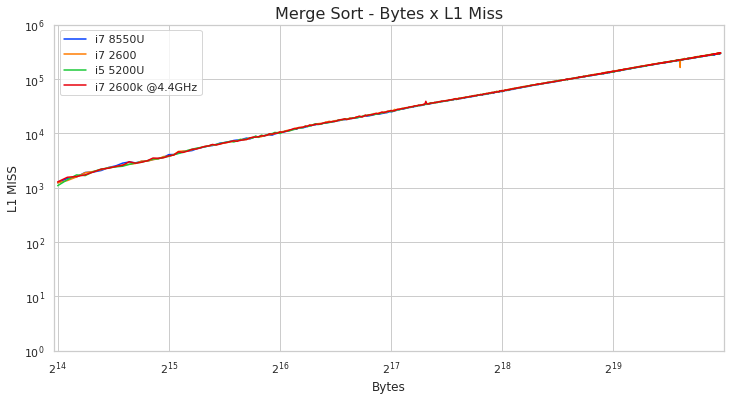

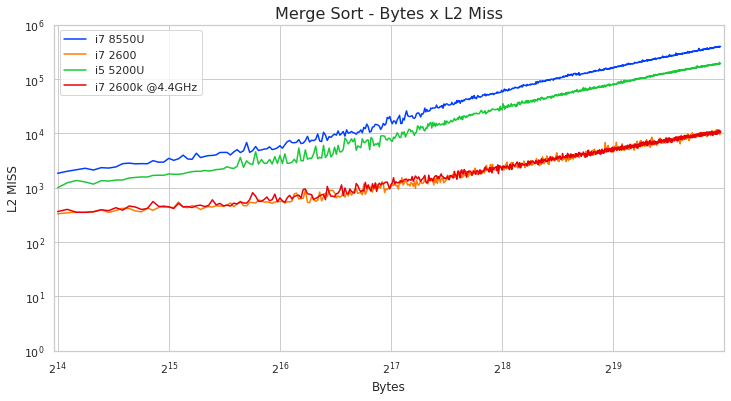

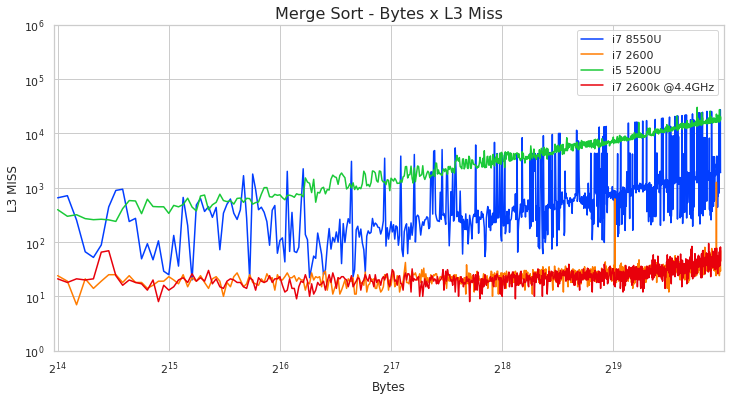

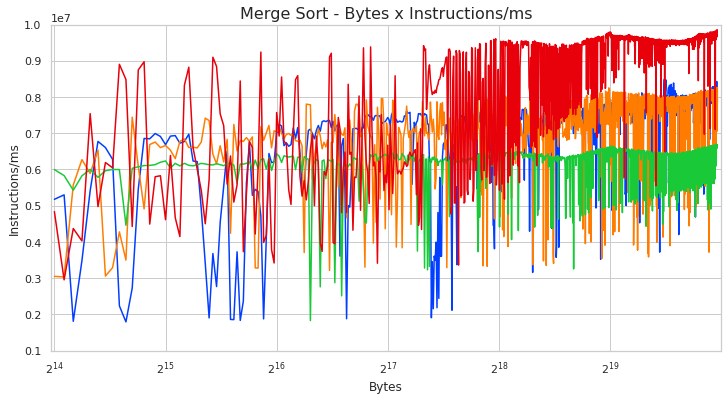

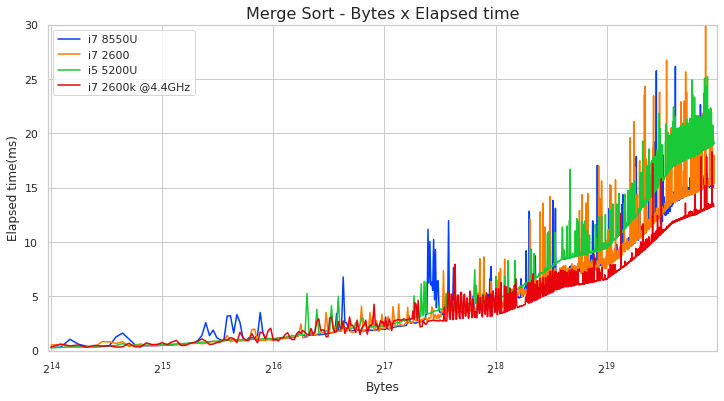

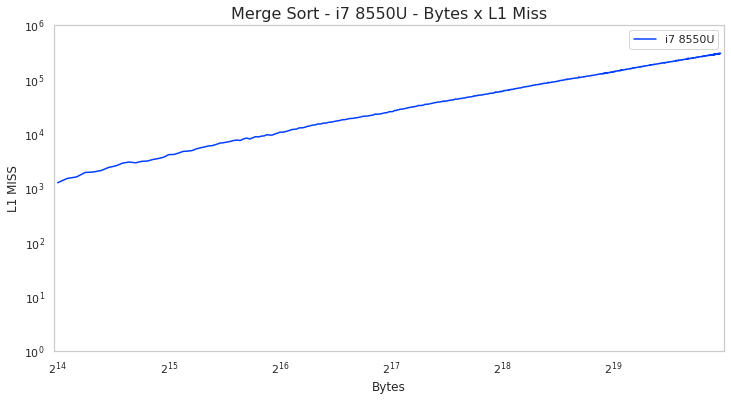

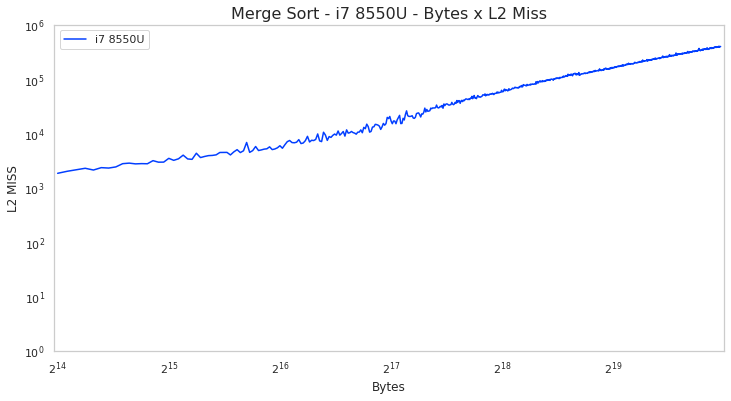

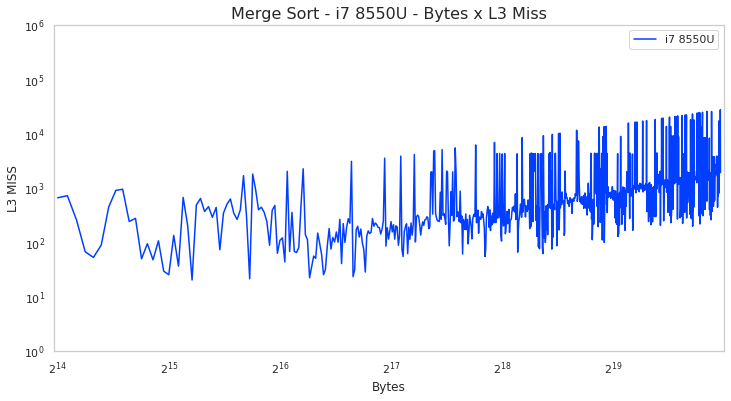

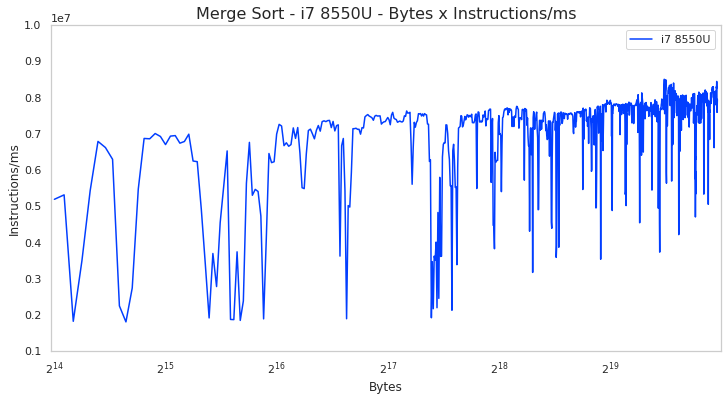

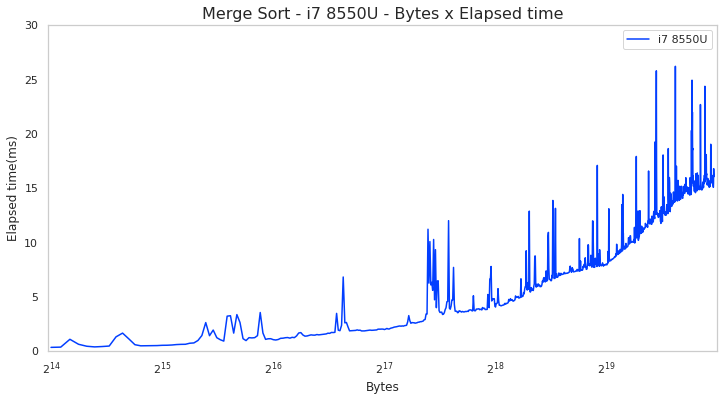

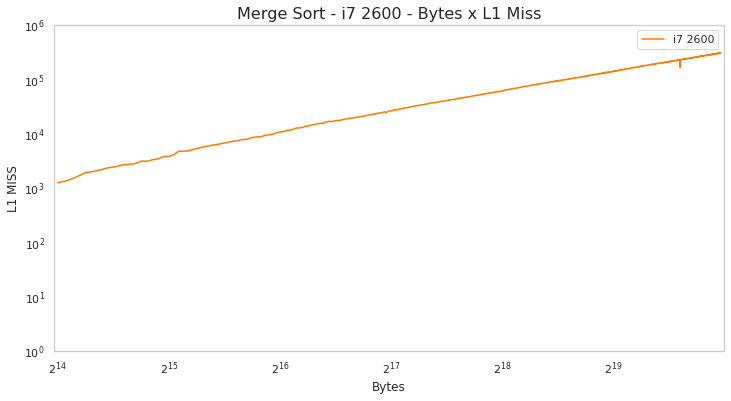

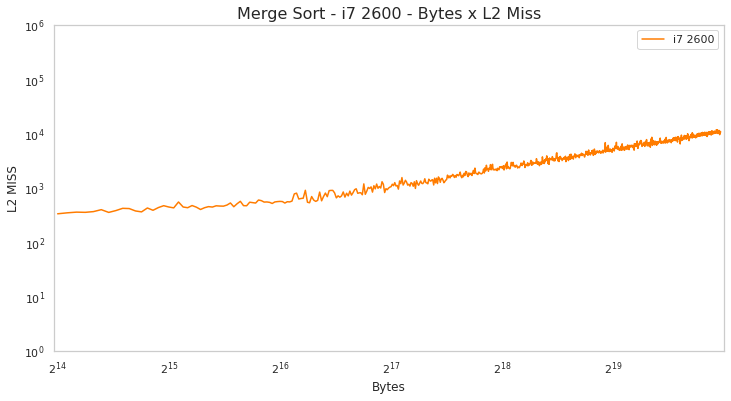

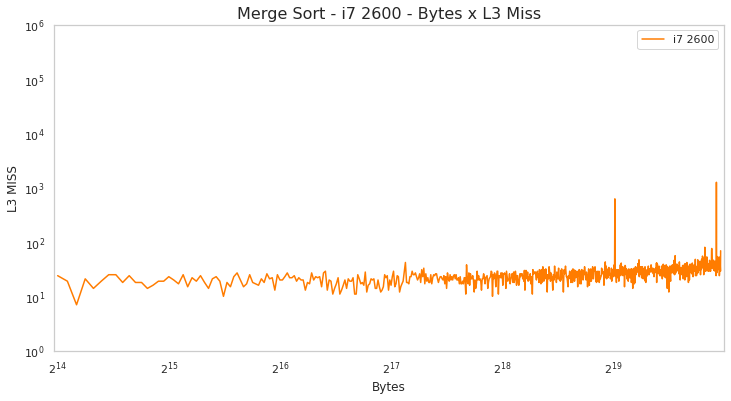

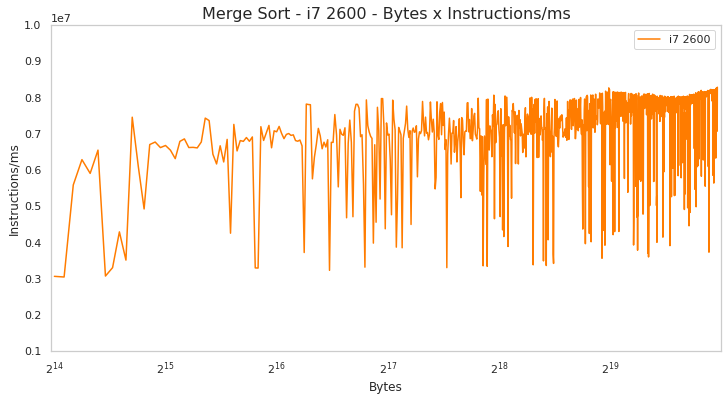

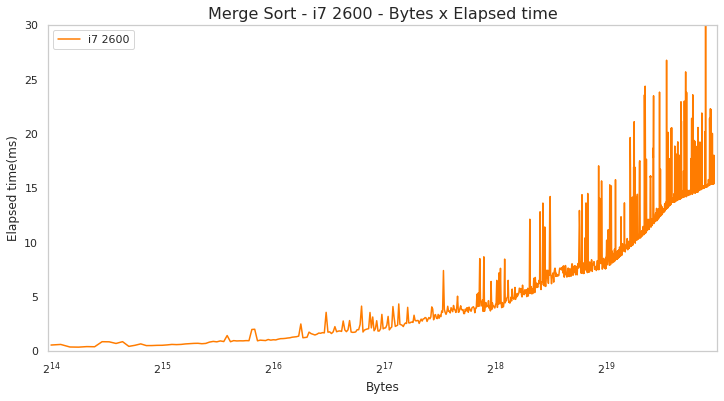

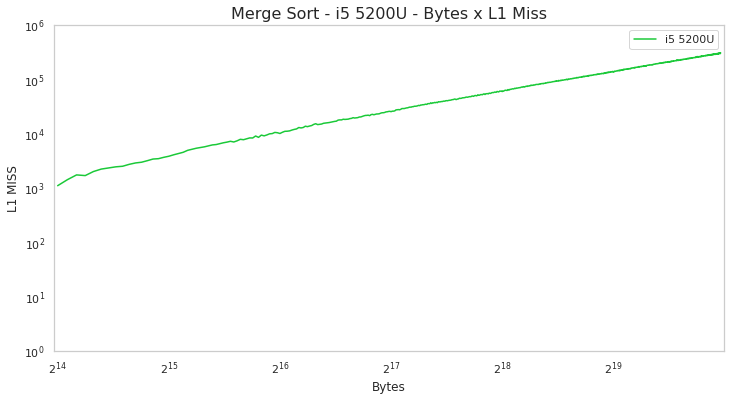

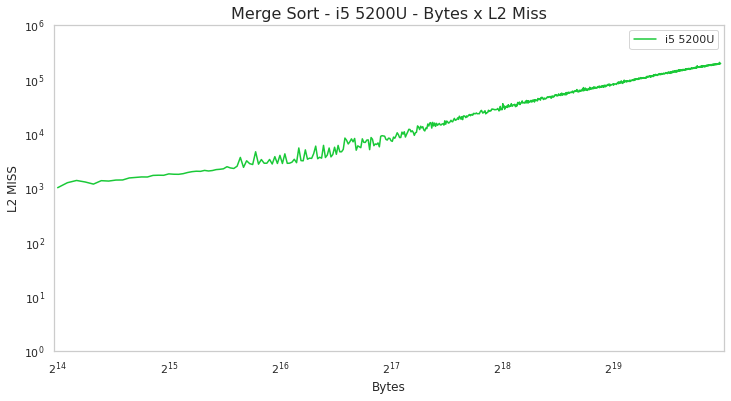

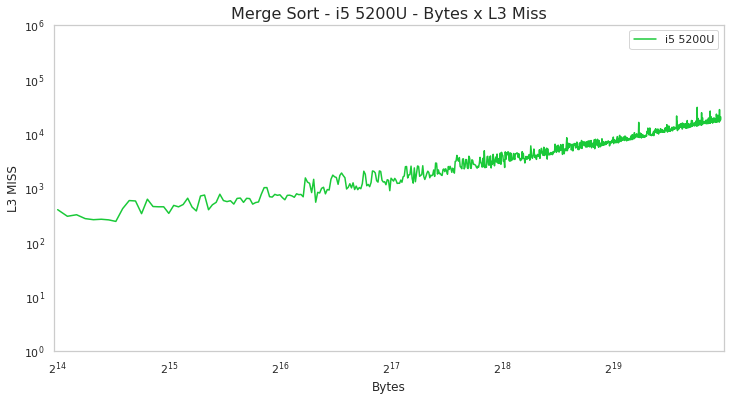

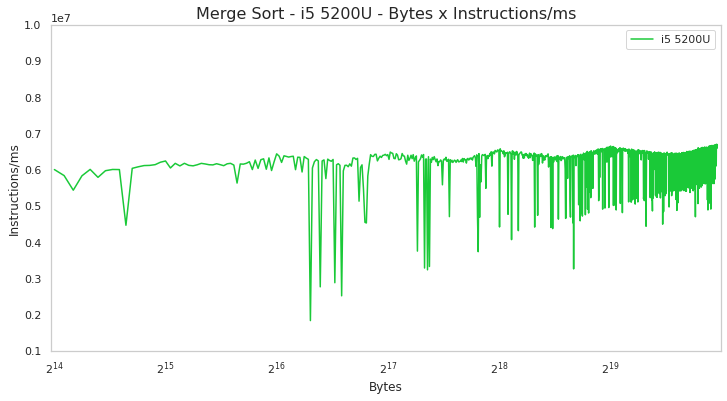

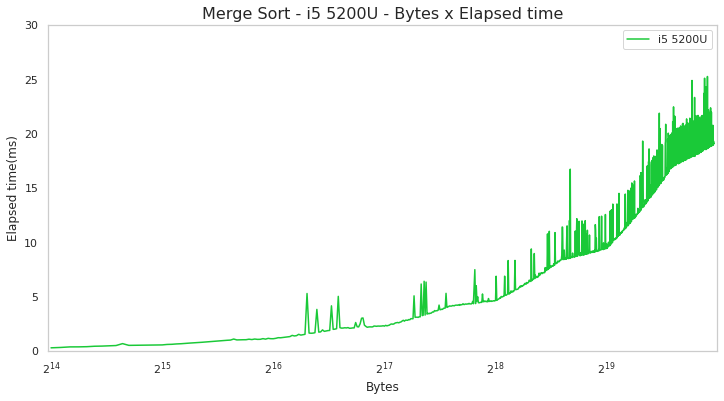

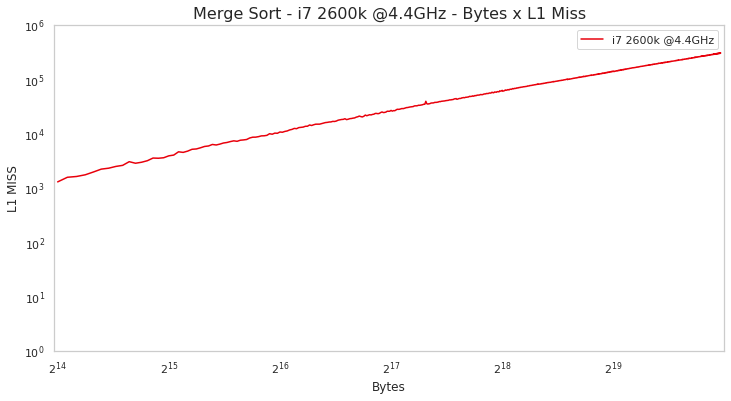

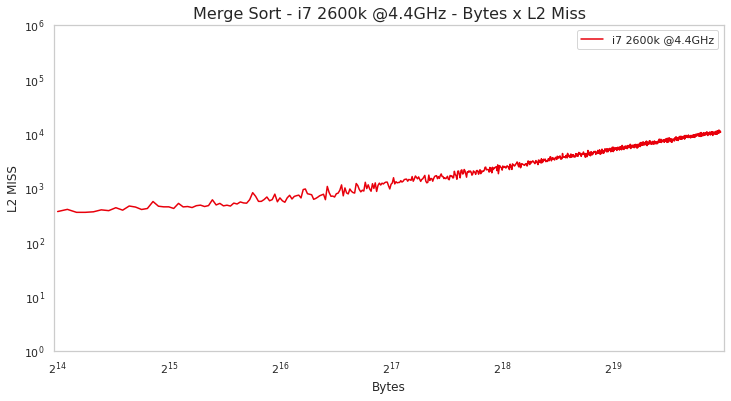

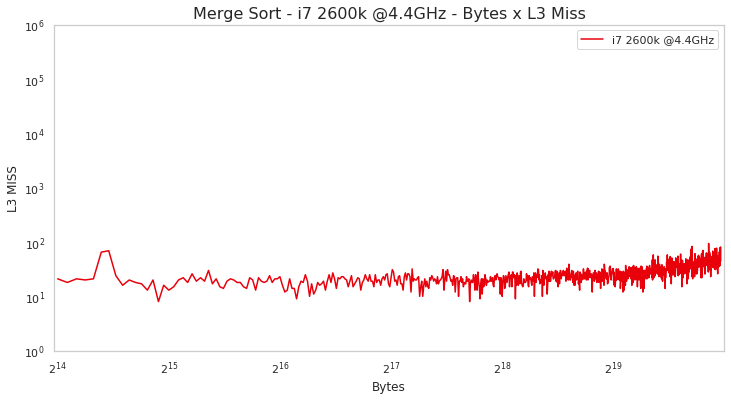

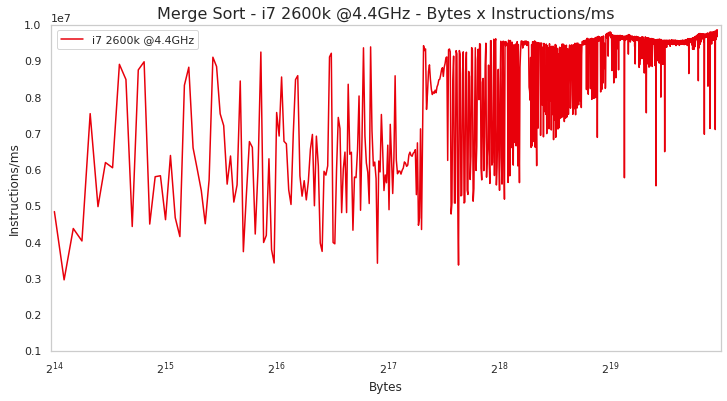

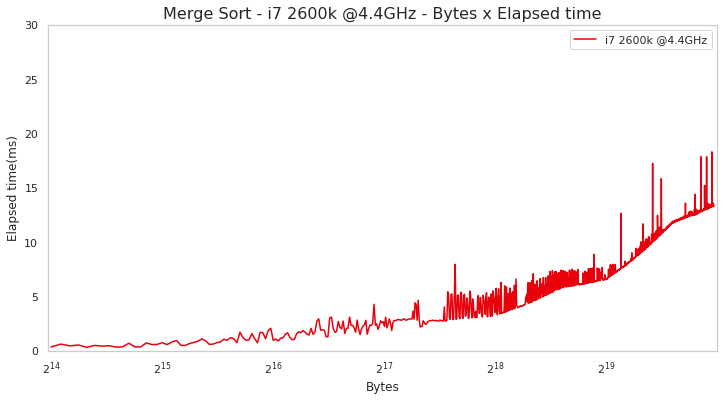

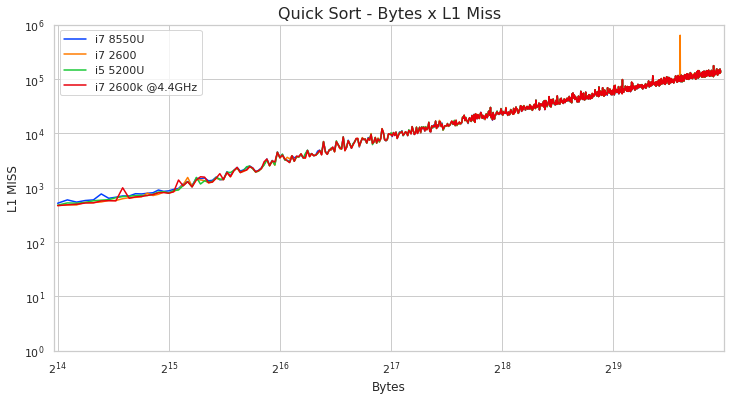

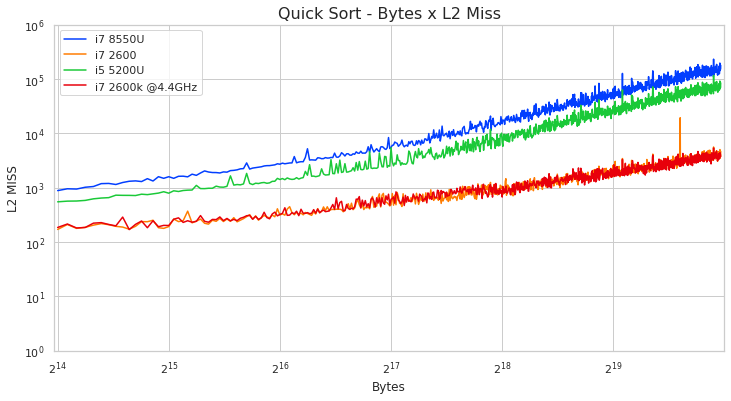

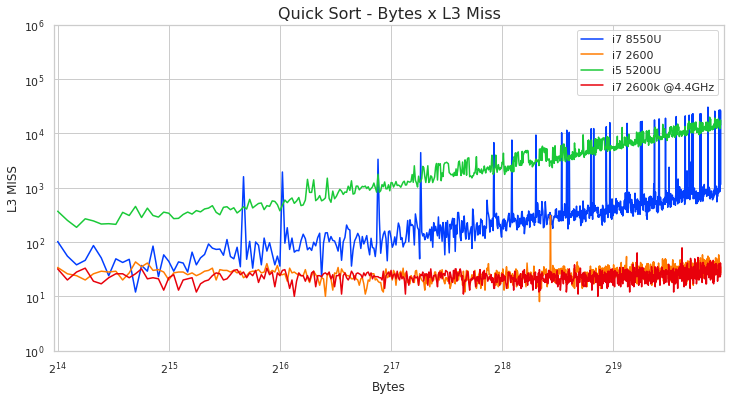

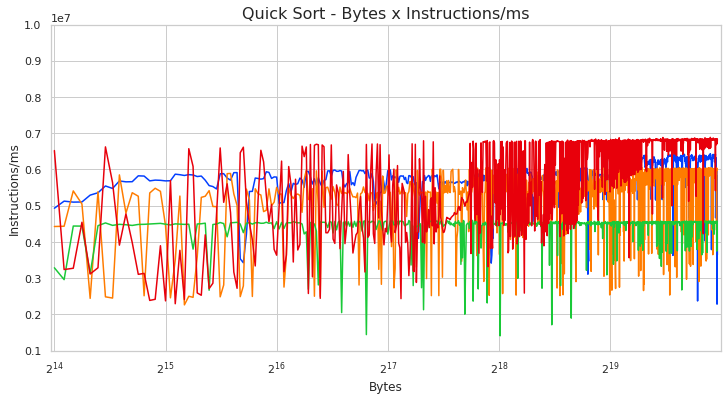

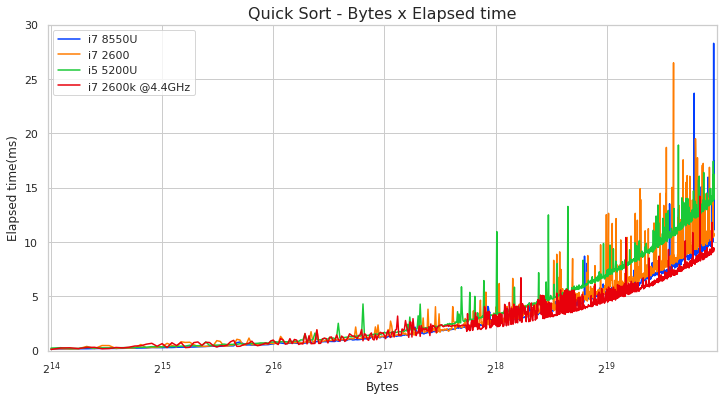

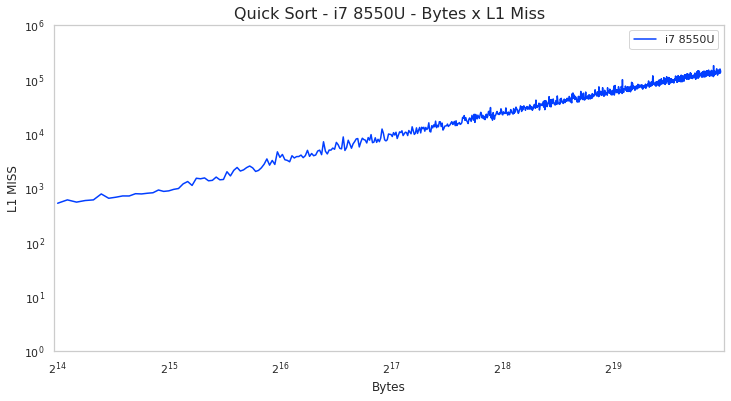

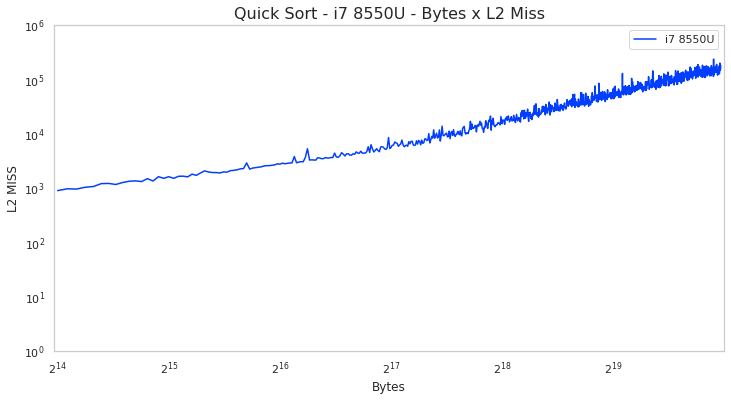

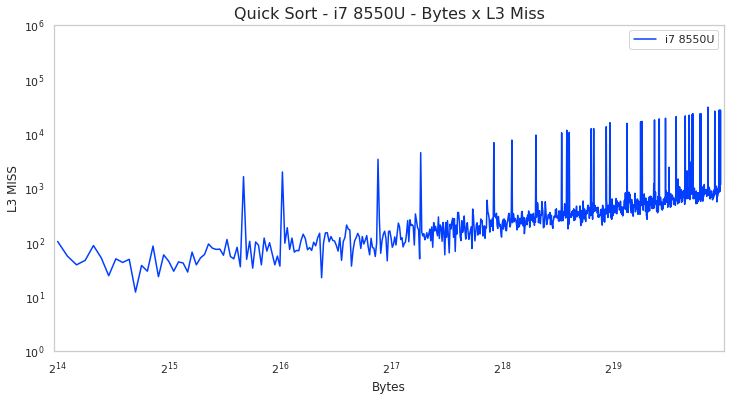

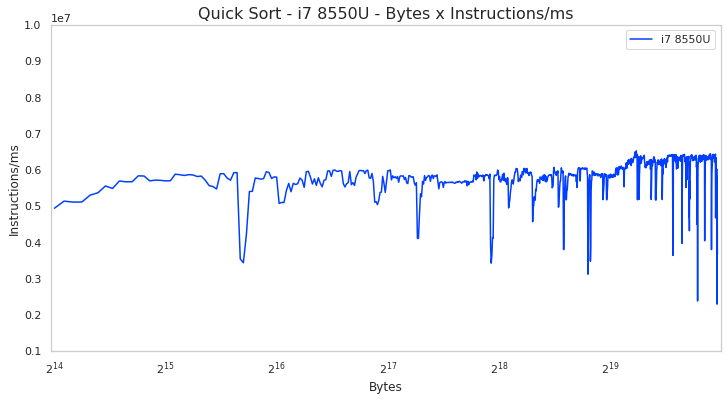

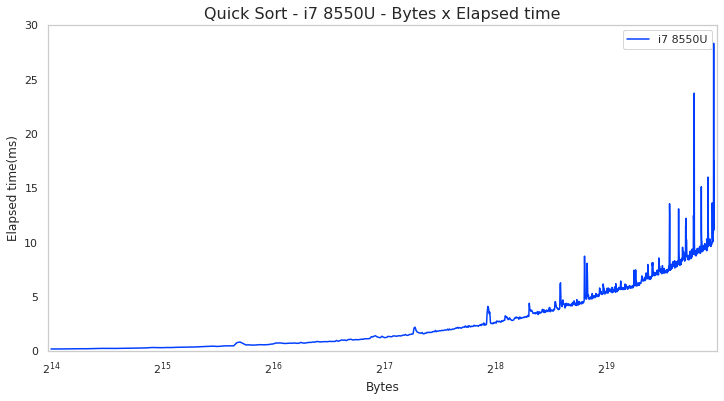

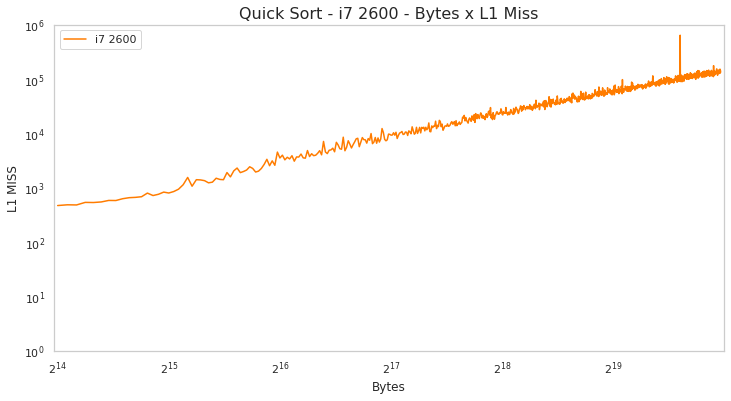

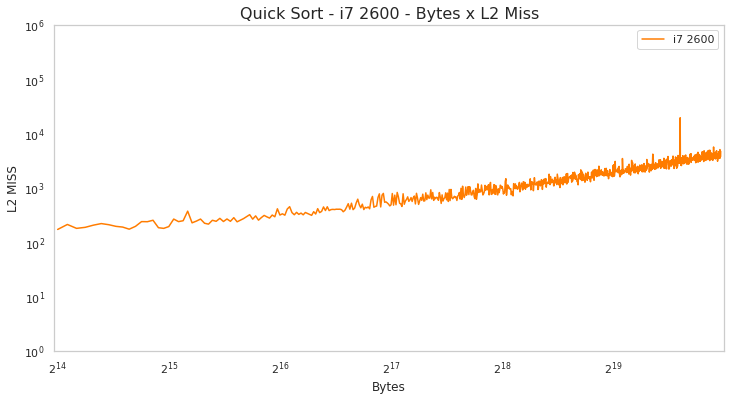

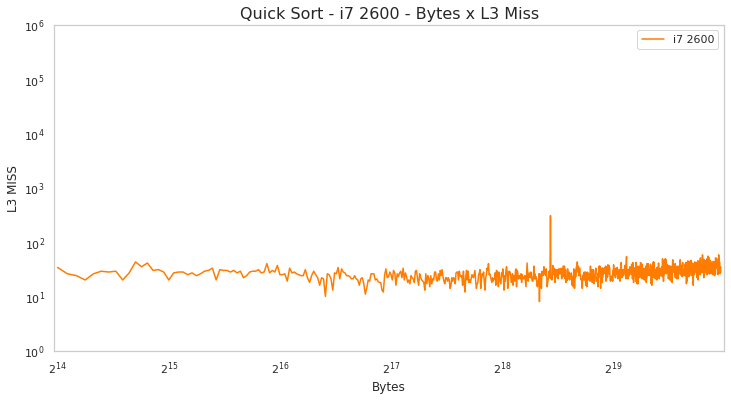

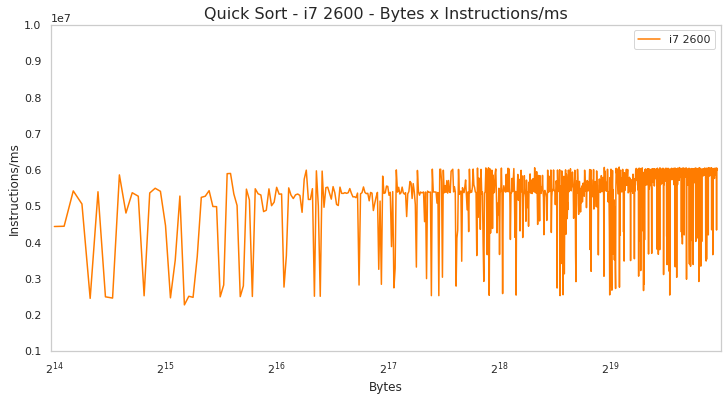

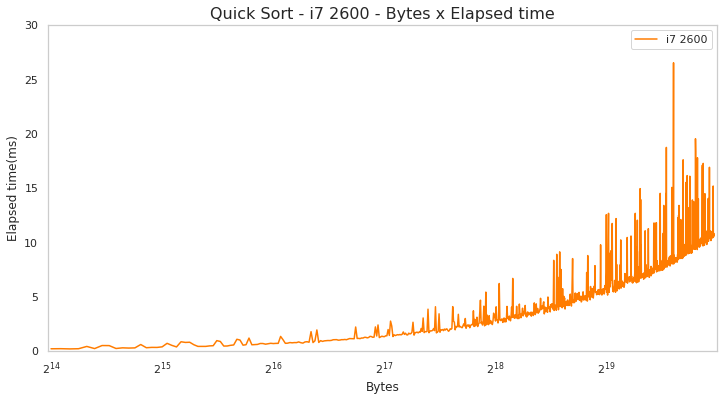

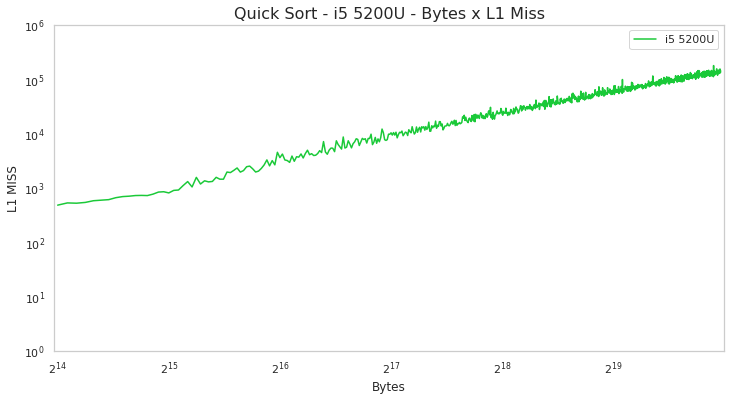

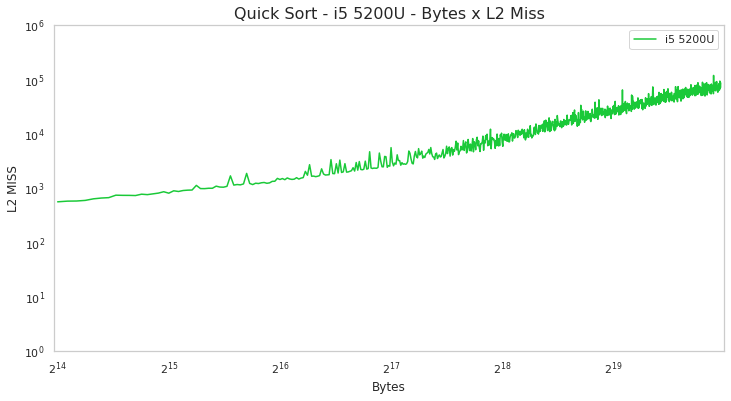

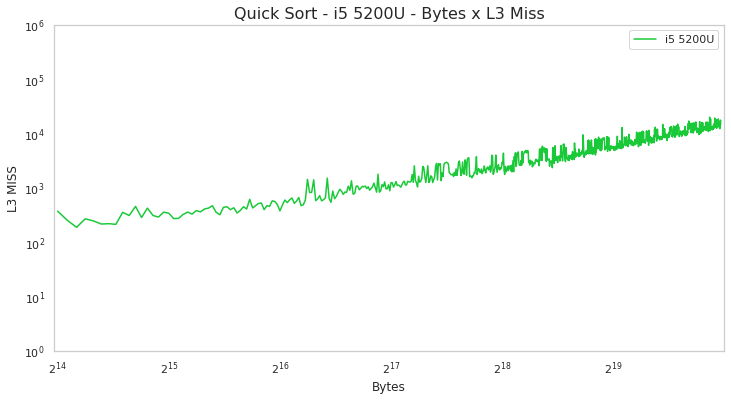

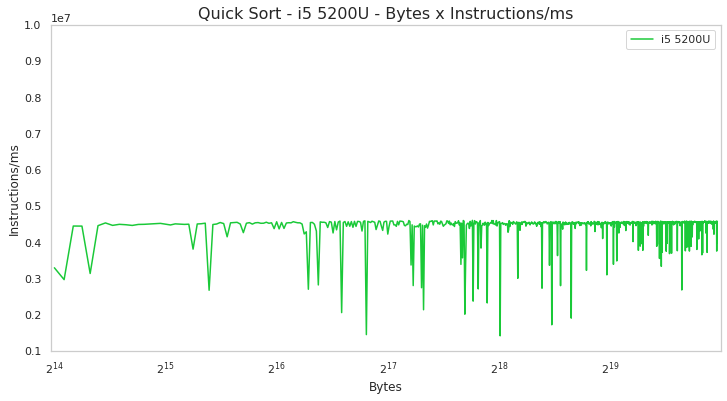

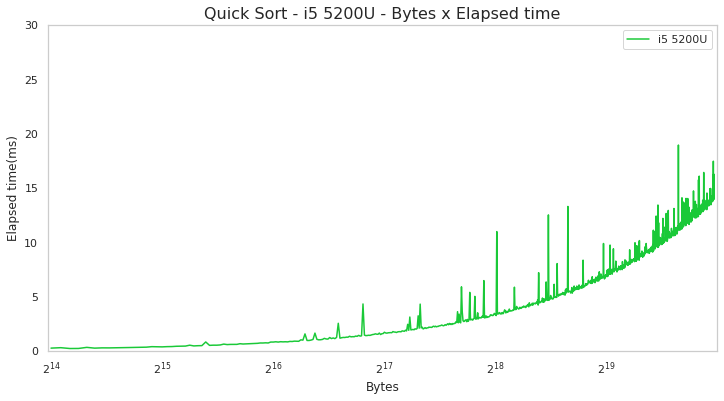

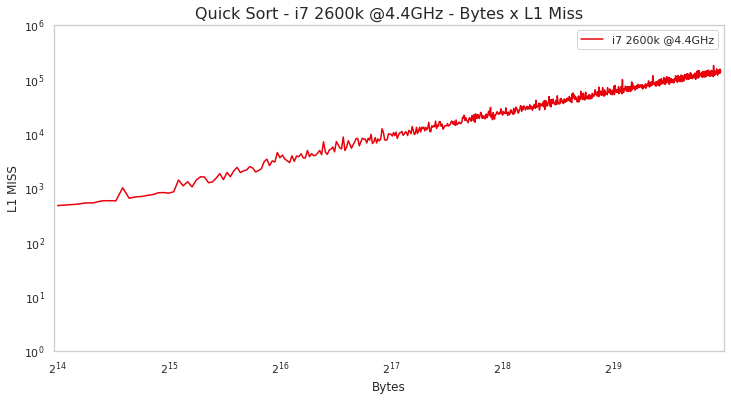

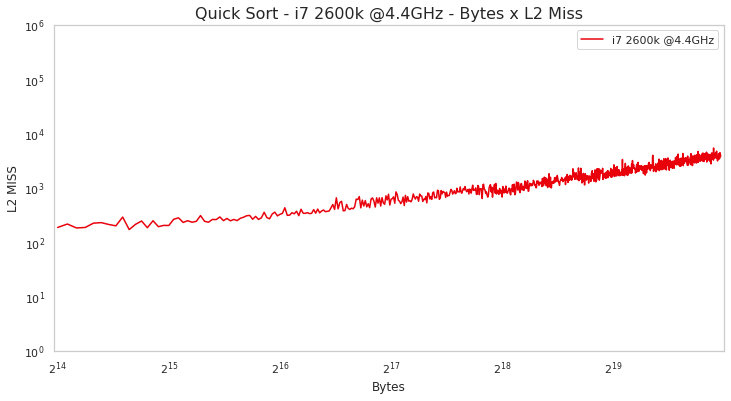

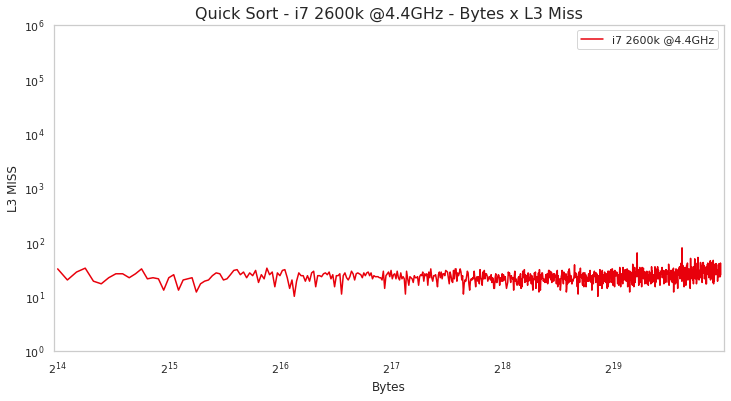

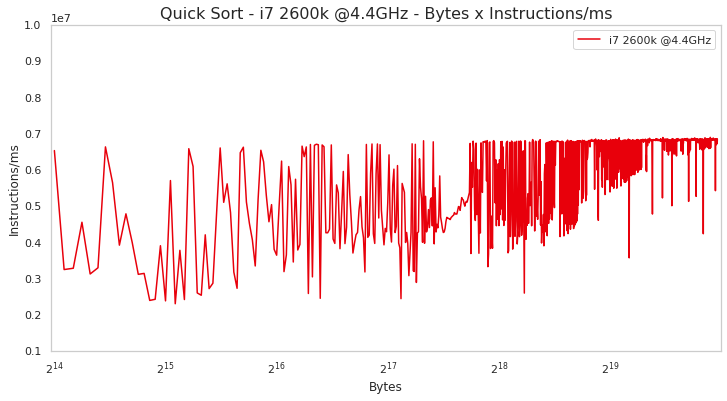

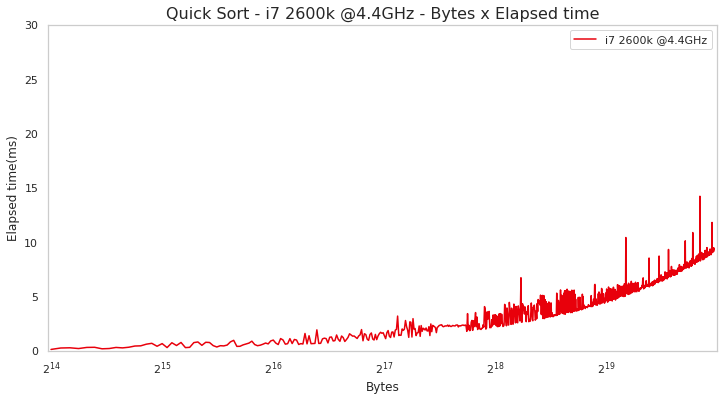

In [11]:
for filename in ['merge_sort.cpp', 'quick_sort.cpp']:
    plotData(filename[:-4])
    plotIndividualData(filename[:-4])